In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [225]:
df=pd.read_csv("sentiment_analysis_data.csv")
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [226]:
df.shape

(5842, 2)

In [227]:
X=df["Sentence"]
y=df["Sentiment"]
X.shape, y.shape

((5842,), (5842,))

In [228]:
y.value_counts()

,count
Sentiment,
neutral,3130
positive,1852
negative,860


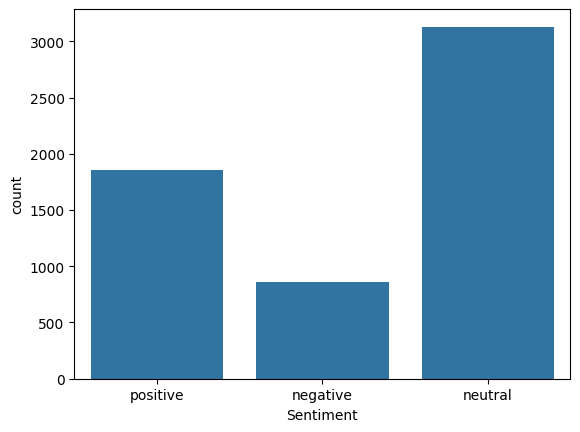

In [229]:
sns.countplot(x='Sentiment', data=df)
plt.show()

In [230]:
positive_sentences=df[df["Sentiment"]=="positive"]["Sentence"]
positive_sentences

,Sentence
0,The GeoSolutions technology will leverage Bene...
2,"For the last quarter of 2010 , Componenta 's n..."
5,$SPY wouldn't be surprised to see a green close
8,Kone 's net sales rose by some 14 % year-on-ye...
10,Circulation revenue has increased by 5 % in Fi...
...,...
5819,Last month we added to our $GILD position and ...
5824,`` In the newly formed company YIT Stavo the l...
5825,Friends Life lifts profits 38% and hikes divi ...
5836,Daily Mail parent company in talks with potent...


In [231]:
positive_text=" ".join(positive_sentences)
positive_text

'The GeoSolutions technology will leverage Benefon \'s GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model . For the last quarter of 2010 , Componenta \'s net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m . $SPY wouldn\'t be surprised to see a green close Kone \'s net sales rose by some 14 % year-on-year in the first nine months of 2008 . Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 . The subdivision made sales revenues last year of EUR 480.7 million EUR 414.9 million in 2008 , and operating profits of EUR 44.5 million EUR 7.4 million . $FB gone green on day $MSFT SQL Server revenue grew double-digit with SQL Server Premium revenue growing over 30% http://stks.co/ir2F Aviva, Friends Life top forecasts ahead of 5.6 billion pound merger Shire CEO ste

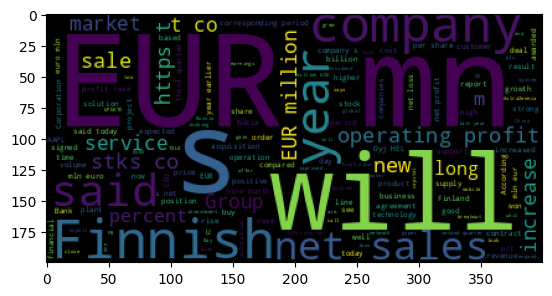

In [232]:
wordcloud_positive=WordCloud().generate(positive_text)
plt.imshow(wordcloud_positive)

In [233]:
negative_sentences=df[df["Sentiment"]=="negative"]["Sentence"]
negative_sentences

,Sentence
1,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
6,Shell's $70 Billion BG Deal Meets Shareholder ...
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...
11,$SAP Q1 disappoints as #software licenses down...
39,$AAPL afternoon selloff as usual will be bruta...
...,...
5829,"$SBUX down PM, from $DB downgrade.. PT cut fro..."
5831,Finnish developer and manufacturer of mobile p...
5832,Operating profit fell to EUR 38.1 mn from EUR ...
5835,HSBC Says Unit to Book $585 Million Charge on ...


In [234]:
negative_text=" ".join(negative_sentences)
negative_text

'$ESI on lows, down $1.50 to $2.50 BK a real possibility Shell\'s $70 Billion BG Deal Meets Shareholder Skepticism SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its results to remain at loss for the full year . $SAP Q1 disappoints as #software licenses down. Real problem? #Cloud growth trails $MSFT $ORCL $GOOG $CRM $ADBE https://t.co/jNDphllzq5 $AAPL afternoon selloff as usual will be brutal. get ready to lose a ton of money. $TSLA recalling pretty much every single model X @cnnbrk got to short that even at work you jump in money trade Dolce & Gabbana has asked the European Union to declare Marimekko Corporation \'s `` Unikko \'\' floral pattern trademark invalid , in a continuing dispute between the two companies . InterContinental Hotels first-quarter global room revenue lags estimates L&G still paying price for dividend cut during crisis, chief says AstraZeneca profit down as sales of stal

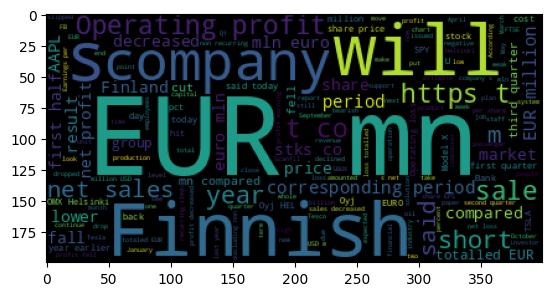

In [235]:
wordcloud_negative=WordCloud().generate(negative_text)
plt.imshow(wordcloud_negative)

In [236]:
neutral_sentences=df[df["Sentiment"]=="neutral"]["Sentence"]
neutral_sentences

,Sentence
3,According to the Finnish-Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...
9,The Stockmann department store will have a tot...
13,Viking Line has canceled some services .
14,Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEME...
...,...
5833,"In 2008 , Kemira recorded revenue of approxima..."
5834,Investments in product development stood at 6....
5838,Nordic Walking was first used as a summer trai...
5839,"According shipping company Viking Line , the E..."


In [237]:
neutral_text=" ".join(neutral_sentences)
neutral_text

"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia . The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland . The Stockmann department store will have a total floor space of over 8,000 square metres and Stockmann 's investment in the project will have a price tag of about EUR 12 million . Viking Line has canceled some services . Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEMENT 7.2.2007 at 10.30 A total of 56,955 new shares of Ahlstrom Corporation have been subscribed with option rights under the company 's stock option programs I 2001 and II 2001 . According to L+ñnnen Tehtaat 's CEO Matti Karppinen , the company aims to deliver fish products to its customers a day earlier than it currently does . The company 's share is quoted on NASDAQ OMX Helsinki Rautaruukki Oyj : RTRKS . Elcoteq SE is listed on the Nasdaq OMX Helsinki Ltd. . Tw

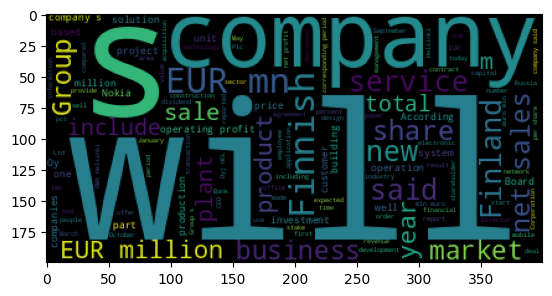

In [238]:
wordcloud_neutral=WordCloud().generate(neutral_text)
plt.imshow(wordcloud_neutral)

In [240]:
vectorizer=CountVectorizer(stop_words="english")
X_vectorized = vectorizer.fit_transform(X)
X_vectorized.toarray()
X_vectorized.shape

(5842, 11126)

In [241]:
vocabulary = vectorizer.vocabulary_
vocabulary

{'geosolutions': 4574,
 'technology': 9925,
 'leverage': 6016,
 'benefon': 1650,
 'gps': 4666,
 'solutions': 9322,
 'providing': 7959,
 'location': 6142,
 'based': 1569,
 'search': 8905,
 'communities': 2487,
 'platform': 7623,
 'relevant': 8333,
 'multimedia': 6765,
 'content': 2657,
 'new': 6890,
 'powerful': 7750,
 'commercial': 2465,
 'model': 6652,
 'esi': 3700,
 'lows': 6208,
 '50': 532,
 'bk': 1726,
 'real': 8179,
 'possibility': 7724,
 'quarter': 8048,
 '2010': 255,
 'componenta': 2546,
 'net': 6876,
 'sales': 8758,
 'doubled': 3303,
 'eur131m': 3758,
 'eur76m': 3876,
 'period': 7482,
 'year': 11021,
 'earlier': 3420,
 'moved': 6734,
 'zero': 11070,
 'pre': 7768,
 'tax': 9900,
 'profit': 7884,
 'loss': 6188,
 'eur7m': 3877,
 'according': 884,
 'finnish': 4245,
 'russian': 8696,
 'chamber': 2230,
 'commerce': 2464,
 'major': 6302,
 'construction': 2640,
 'companies': 2490,
 'finland': 4240,
 'operating': 7149,
 'russia': 8695,
 'swedish': 9774,
 'buyout': 2001,
 'firm': 4255,
 '

In [242]:
netflix_position=vectorizer.vocabulary_["netflix"]
netflix_position

6882

In [243]:
X_train,X_test,y_train,y_test=train_test_split(X_vectorized,
                                               y,
                                               test_size=0.25,
                                               random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4381, 11126), (1461, 11126), (4381,), (1461,))

In [244]:
y_test.value_counts()

,count
Sentiment,
neutral,771
positive,472
negative,218


In [271]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [272]:
model.score(X_train,y_train)

0.8557406984706688

In [273]:
model.score(X_test,y_test)

0.6878850102669405

In [274]:
y_pred=model.predict(X_test)

In [275]:
cm=confusion_matrix(y_test,y_pred)

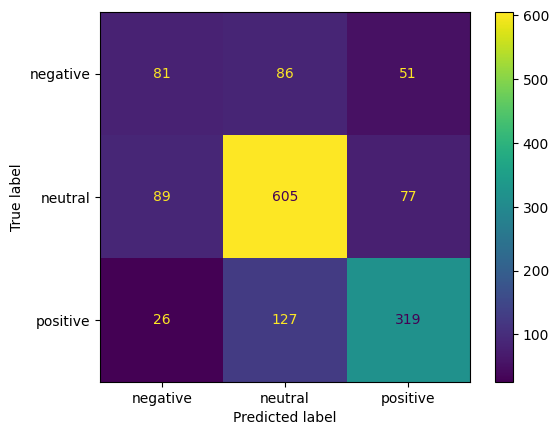

In [276]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [277]:
test_sentence='The compnay XYZ did not perform well in the first quarter. Its sales have been declining.'
test_sentence_vectorized=vectorizer.transform([test_sentence])

In [278]:
model.predict(test_sentence_vectorized)

array(['neutral'], dtype='<U8')

In [279]:
test_sentence='The growth rate of the company has been positive. Its shares price is also increasing. Customers like the companys policies'
test_sentence_vectorized=vectorizer.transform([test_sentence])

In [280]:
model.predict(test_sentence_vectorized)

array(['positive'], dtype='<U8')

In [281]:
#We observe that the model performs poorly for negative sentiments
#This is perhaps due to DATA IMBALANCE
#Let us try balancing the data
#We will use Synthetic Minority Over-Sampling Technique (SMOTE) to balance the dataset

In [282]:
smote=SMOTE(random_state=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pd.Series(y_train_resampled).value_counts()

,count
Sentiment,
positive,2359
neutral,2359
negative,2359


In [283]:
model.fit(X_train_resampled,y_train_resampled)

MultinomialNB()

In [284]:
model.score(X_train_resampled,y_train_resampled)

0.7756111346615797

In [285]:
model.score(X_test,y_test)

0.6550308008213552

In [286]:
y_pred=model.predict(X_test)

In [287]:
cm=confusion_matrix(y_test,y_pred)

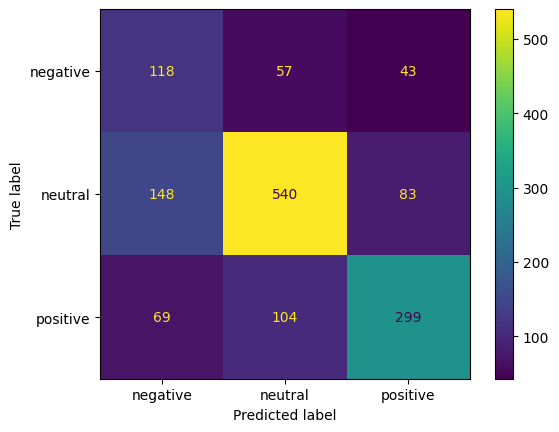

In [288]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [289]:
test_sentence='The compnay XYZ did not perform well in the first quarter. Its sales have been declining.'
test_sentence_vectorized=vectorizer.transform([test_sentence])

In [290]:
model.predict(test_sentence_vectorized)

array(['negative'], dtype='<U8')

In [291]:
#We observe that after balancing the dataset, it performs better